# Pregunta 3

## Desarrollo a)

In [1]:
from scipy.sparse import csr_matrix
from sklearn.utils import shuffle
import numpy as np
user_skills = open('user_skill','r')

col = []
row = []
data = []

counter = 0
for line in user_skills:
    line = line.strip('\n')
    skills = map(int,line.split(':')[1].split(','))
    data += ([1]*len(skills))
    row +=([counter]*len(skills))
    col += (skills)
    counter += 1

user_skills.close()
col = np.asarray(col)
row = np.asarray(row)
data = np.asarray(data)
Z = csr_matrix((data,(row, col)), shape = (counter+1,14544))
print len(Z.toarray())
print Z.shape

7891
(7891, 14544)


## Desarrollo b)

In [2]:
nrows = np.shape(Z)[0]
Z=shuffle(Z, random_state = 0)
train_size = int(0.7*nrows)
Ztr = Z[range(train_size),:]
Zts = Z[range(train_size, nrows),:]

## Desarrollo c)

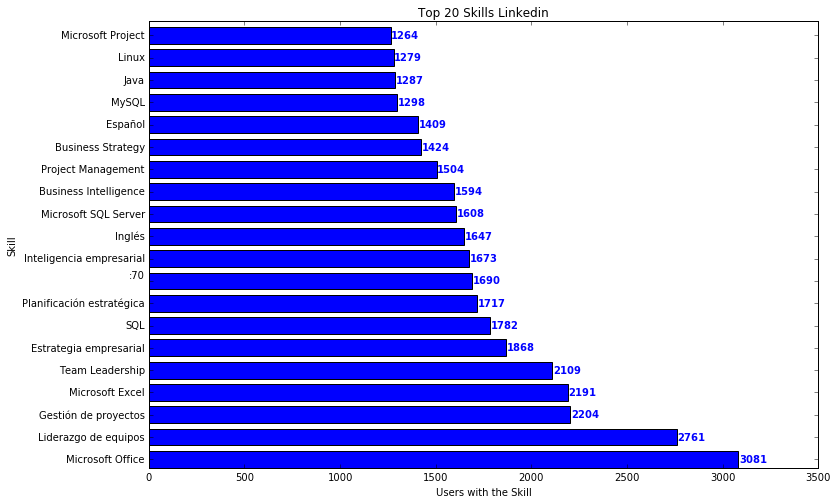

In [12]:
%matplotlib inline
import operator
skills_count = np.asarray(Z.sum(axis=0))[0]
skills_labels = []
skills_id = open('skill_id','r')
for line in skills_id:
    skills_labels.append(unicode(line.split(' :')[0],'utf-8'))
    
dictionary = dict(zip(skills_labels, skills_count.T))
x = []
y = []
for i in range(20):
    skill = max(dictionary.iteritems(), key=operator.itemgetter(1))[0]
    x.append(skill)
    y.append(dictionary.get(skill))
    del dictionary[skill]

import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
plt.title('Top 20 Skills Linkedin')
plt.xlabel('Users with the Skill')
plt.ylabel('Skill')      
plt.show()

# Desarrollo d)
Se incluye dentro del desarrollo de la pregunta f). No se hace aquí debido a que es necesario modificar los vectores de entrenamiento y test según la skill para la que se esté entrenando el modelo.

In [6]:
from sklearn import linear_model
selected_skills = [639]
for skill in selected_skills:
    ytr = Ztr[:,skill]
    Xtr = csr_matrix(np.delete(Ztr.toarray(),skill,1))
    yts = Zts[:,skill]
    Xts = csr_matrix(np.delete(Zts.toarray(),skill,1))
    
    #Logistic Regression model
    logit_model = linear_model.LogisticRegression(C=1e5)
    ytr = np.ravel(ytr.toarray())
    yts = np.ravel(yts.toarray())
    logit_model.fit(Xtr, ytr)
    
    print logit_model.score(Xtr, ytr)
    print logit_model.score(Xts, yts)
    
#TODO: implementar cross validation para escoger parámetros

1.0
0.978040540541


# Desarrollo e)
Se incluye dentro del desarrollo de la pregunta f). La skill escogida para esta pregunta es id 29. Se hace de esta manera para facilitar el análisis de la pregunta f).



# Desarrollo f) Modelos

Dado que los objetivos son entrenar varios modelos con distintas skill como target, se escogieron 3 distintas que poseen distintos porcentajes de presencia dentro del dataset.

Se escogieron las siguientes 3 skill:
<li>id 29: Microsoft Office con 3081 perfiles. Aproximadamente 39.04%. Utilizada en pregunta e)</li>
<li>id 255: SAP con 639 perfiles. Aproximadamente 8.09%</li>
<li>id 8185: Business Inteligence con 1594 perfiles. Aproximadamente 20.20%</li>

Como se ve la presencia de estas skill varía de los 8% (SAP), hasta 39% (Microsoft Office). Con esto se busca observar el comportamiento de las técnicas de clasificación según el soporte dentro del dataset.

**Logistic Regression:**<br>
Para el skill Microsoft Office se observa que la mejor precision en el dataset de entrenamiento se da cuando el valor del parámetro C es igual a 0.01. Logrando una  precisión de 0.83

Para el skill SAP se observa que la mejor precision en el dataset de entrenamiento se da cuando el valor del parámetro C es igual a 0.1. Logrando una  precisión de 0.92

Para el skill Business Inteligence se observa que la mejor precision en el dataset de entrenamiento se da cuando el valor del parámetro C es igual a 0.01. Logrando una  precisión de 1

**A continuación se muestran resumidos los resultados obtenidos.**


**Skill 29 Microsoft Office:**
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-s6z2{text-align:center}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-hgcj{font-weight:bold;text-align:center}
</style>
<table class="tg">
  <tr>
    <th class="tg-hgcj">Skill 29</th>
    <th class="tg-hgcj">Train Accuracy</th>
    <th class="tg-hgcj">Test Accuracy</th>
  </tr>
  <tr>
    <td class="tg-s6z2">NB</td>
    <td class="tg-s6z2">84.77%</td>
    <td class="tg-s6z2">79.97%</td>
  </tr>
  <tr>
    <td class="tg-baqh">MNB</td>
    <td class="tg-baqh">84.41%</td>
    <td class="tg-baqh">78.91%</td>
  </tr>
  <tr>
    <td class="tg-baqh">SVM 0.01</td>
    <td class="tg-baqh">87.92%</td>
    <td class="tg-baqh">83.10%</td>
  </tr>
  <tr>
    <td class="tg-baqh">LR 0.01</td>
    <td class="tg-baqh">84.06%</td>
    <td class="tg-baqh">83.86%</td>
  </tr>
</table>

Para la skill 29 Microsoft Office, los mejores resultados se obtuvieron utilizando LR con un parámetro de regularización de 0.01. Como se muestra en la tabla, además se entrenaron modelos de Naive Bayes, Multinomial Naive Bayes y SVM. Dentro de los parámetros de regularización utilizados para SVM se encuentran 0.01, 0.1, 10, 100 y 1000, pero en la tabla solo se muestra aquel con el que se obtuvo la mejor precisión (0.01).

**Skill 255 SAP:**
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-s6z2{text-align:center}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-hgcj{font-weight:bold;text-align:center}
</style>
<table class="tg">
  <tr>
    <th class="tg-hgcj">Skill 255</th>
    <th class="tg-hgcj">Train Accuracy</th>
    <th class="tg-hgcj">Test Accuracy</th>
  </tr>
  <tr>
    <td class="tg-s6z2">NB</td>
    <td class="tg-s6z2">92.77%</td>
    <td class="tg-s6z2">89.52%</td>
  </tr>
  <tr>
    <td class="tg-baqh">MNB</td>
    <td class="tg-baqh">93.02%</td>
    <td class="tg-baqh">86.60%</td>
  </tr>
  <tr>
    <td class="tg-baqh">SVM 0.01</td>
    <td class="tg-baqh">94.31%</td>
    <td class="tg-baqh">92.35%</td>
  </tr>
  <tr>
    <td class="tg-baqh">LR 0.1</td>
    <td class="tg-baqh">94.35%</td>
    <td class="tg-baqh">92.18%</td>
  </tr>
</table>

La siguiente skill escogida es 255 SAP. Para esta skill el mejor resultado se obtuvo con Support vector machine. La precisión de pruebas alcanzada fue de 92.35%, con parámetro de regularización igual a 0.01. Se observan en la tabla los otros resultados obtenidos para los distintos modelos entrenados.

**Skill 8185 Business Intelligence:**

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-s6z2{text-align:center}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-hgcj{font-weight:bold;text-align:center}
</style>
<table class="tg">
  <tr>
    <th class="tg-hgcj">Skill 8185</th>
    <th class="tg-hgcj">Train Accuracy</th>
    <th class="tg-hgcj">Test Accuracy</th>
  </tr>
  <tr>
    <td class="tg-s6z2">NB</td>
    <td class="tg-s6z2">99.98%</td>
    <td class="tg-s6z2">100%</td>
  </tr>
  <tr>
    <td class="tg-baqh">MNB</td>
    <td class="tg-baqh">99.49%</td>
    <td class="tg-baqh">98.73%</td>
  </tr>
  <tr>
    <td class="tg-baqh">SVM &gt;0.1</td>
    <td class="tg-baqh">100%</td>
    <td class="tg-baqh">100%</td>
  </tr>
  <tr>
    <td class="tg-baqh">LR 0.01</td>
    <td class="tg-baqh">99.98%</td>
    <td class="tg-baqh">100%</td>
  </tr>
</table>

Por último para la skill 8185 BI, el mejor resultado se obtuvo con Naive Bayes y Logistic Regression. Con ambos se obtuvo un 100% de precisión con los datos de pruebas y un 99.98% de precisión con los datos de entrenamiento. Si bien esto parece no estar correcto, hay muchos factores por los cuales se pudo haber obtenido este resultado. Por ejemplo, la cantidad de datos con los que se prueba el modelo. La cantidad de ejemplos de cada clase presente en los dataset de train y test, entre otros factores.


Cabe agregar que con los resultados obtenidos, no parece haber una relación entre la cantidad de muestras de cada clase y la calidad del modelo generado.
Según las tablas anteriormente descritas los mejores resultados se obtienen con la Skill Business Intelligence que está presente en un 20% de los perfiles. Luego le siguen los modelos de la skill SAP que está presente en un 8% de los perfiles. Y la skill Microsoft Office, que se encuentra presente en un 39.09% de los perfiles obtiene los peores resultados. (Sobre el 79%)

In [7]:
# Función para obtener los resultados de cada modelo.
from sklearn.metrics import classification_report
def score_the_model(model,x,y,xt,yt,text):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt[:-1],yt[:-1])
    print "Training Accuracy %s: %f"%(text,acc_tr)
    print "Test Accuracy %s: %f"%(text,acc_test)
    print "Detailed Analysis Testing Results ..."
    print(classification_report(yt, model.predict(xt), target_names=['+','-']))

### Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
import time
def do_LOGIT(x,y,xt,yt):
    start_t = time.time()
    Cs = [0.01,0.1,10,100,1000]
    for C in Cs:
        print "Usando C= %f"%C
        model = LogisticRegression(penalty='l2',C=C)
        model = model.fit(x, y)
        score_the_model(model,x,y,xt,yt,"LOGISTIC")

In [9]:
selected_skills = [29, 255, 8185]
for skill in selected_skills:
    print 'Modelo para el skill: {}'.format(skills_labels[skill])
    ytr = Ztr[:,skill]
    Xtr = csr_matrix(np.delete(Ztr.toarray(),skill,1))
    yts = Zts[:,skill]
    Xts = csr_matrix(np.delete(Zts.toarray(),skill,1))
    model=do_LOGIT(Xtr, ytr.toarray()[:,0], Xts, yts.toarray()[:,0])

Modelo para el skill: Microsoft Office
Usando C= 0.010000
Training Accuracy LOGISTIC: 0.840666
Test Accuracy LOGISTIC: 0.838614
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.84      0.91      0.87      1443
          -       0.84      0.73      0.78       925

avg / total       0.84      0.84      0.84      2368

Usando C= 0.100000
Training Accuracy LOGISTIC: 0.877422
Test Accuracy LOGISTIC: 0.831432
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.84      0.89      0.87      1443
          -       0.81      0.74      0.77       925

avg / total       0.83      0.83      0.83      2368

Usando C= 10.000000
Training Accuracy LOGISTIC: 0.978454
Test Accuracy LOGISTIC: 0.785382
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.82      0.83      0.83      1443
          -       0.73      0.71      0.72

### Naive Bayes

In [13]:
from sklearn.naive_bayes import BernoulliNB
import random

def do_NAIVE_BAYES(x,y,xt,yt):
    model = BernoulliNB()
    model = model.fit(x, y)
    score_the_model(model,x,y,xt,yt,"BernoulliNB")
    return model

#selected_skills = [639, 1594, 29]
selected_skills = [29, 255, 8185]
for skill in selected_skills:
    ytr = Ztr[:,skill]
    Xtr = csr_matrix(np.delete(Ztr.toarray(),skill,1))
    yts = Zts[:,skill]
    Xts = csr_matrix(np.delete(Zts.toarray(),skill,1))
    model=do_NAIVE_BAYES(Xtr, ytr.toarray()[:,0], Xts, yts.toarray()[:,0])

Training Accuracy BernoulliNB: 0.847728
Test Accuracy BernoulliNB: 0.799747
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.82      0.85      0.84      1443
          -       0.76      0.72      0.74       925

avg / total       0.80      0.80      0.80      2368

Training Accuracy BernoulliNB: 0.927757
Test Accuracy BernoulliNB: 0.895226
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.92      0.97      0.94      2165
          -       0.27      0.13      0.18       203

avg / total       0.87      0.90      0.88      2368

Training Accuracy BernoulliNB: 0.999819
Test Accuracy BernoulliNB: 1.000000
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       1.00      1.00      1.00      2368

avg / total       1.00      1.00      1.00      2368



### Multinomial Naive Bayes

In [15]:
from sklearn.naive_bayes import MultinomialNB
import random

def do_MULTINOMIAL(x,y,xt,yt):
    model = MultinomialNB()
    model = model.fit(x, y)
    score_the_model(model,x,y,xt,yt,"MULTINOMIAL")
    return model
selected_skills = [29, 255, 8185]
for skill in selected_skills:
    ytr = Ztr[:,skill]
    Xtr = csr_matrix(np.delete(Ztr.toarray(),skill,1))
    yts = Zts[:,skill]
    Xts = csr_matrix(np.delete(Zts.toarray(),skill,1))
    model=do_MULTINOMIAL(Xtr, ytr.toarray()[:,0], Xts, yts.toarray()[:,0])

Training Accuracy MULTINOMIAL: 0.844106
Test Accuracy MULTINOMIAL: 0.789185
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.84      0.80      0.82      1443
          -       0.71      0.77      0.74       925

avg / total       0.79      0.79      0.79      2368

Training Accuracy MULTINOMIAL: 0.930292
Test Accuracy MULTINOMIAL: 0.866075
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.93      0.93      0.93      2165
          -       0.22      0.22      0.22       203

avg / total       0.87      0.87      0.87      2368

Training Accuracy MULTINOMIAL: 0.994930
Test Accuracy MULTINOMIAL: 0.987326
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       1.00      0.99      0.99      2368
          -       0.00      0.00      0.00         0

avg / total       1.00      0.99      0.99      2368



### Support Vector Machine

In [17]:
from sklearn.svm import LinearSVC
def do_SVM(x,y,xt,yt):
    Cs = [0.01,0.1,10,100,1000]
    for C in Cs:
        print "El valor de C que se esta probando: %f"%C
        model = LinearSVC(C=C)
        model = model.fit(x, y)
        score_the_model(model,x,y,xt,yt,"SVM")

from sklearn.utils import shuffle
selected_skills = [29, 255, 8185]
for skill in selected_skills:
    ytr = Ztr[:,skill]
    Xtr = csr_matrix(np.delete(Ztr.toarray(),skill,1))
    yts = Zts[:,skill]
    Xts = csr_matrix(np.delete(Zts.toarray(),skill,1))
    do_SVM(Xtr, ytr.toarray()[:,0], Xts, yts.toarray()[:,0])

El valor de C que se esta probando: 0.010000
Training Accuracy SVM: 0.879232
Test Accuracy SVM: 0.831010
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.84      0.90      0.87      1443
          -       0.82      0.73      0.77       925

avg / total       0.83      0.83      0.83      2368

El valor de C que se esta probando: 0.100000
Training Accuracy SVM: 0.946587
Test Accuracy SVM: 0.801859
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.83      0.85      0.84      1443
          -       0.76      0.72      0.74       925

avg / total       0.80      0.80      0.80      2368

El valor de C que se esta probando: 10.000000
Training Accuracy SVM: 0.985515
Test Accuracy SVM: 0.760879
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.80      0.80      0.80      1443
          -       0.69      0.69 